In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# PREDICTING STATE

In [2]:
# read data for experimentally determined structures in complex with active molecules
df = pd.read_csv('data/364_interaction_energies_state_function_v4.txt', sep='\t')

#drop rows with 'other' state
df = df.drop(df[df['State'] == 'Other'].index)

#drop index
df.drop('index', axis = 1, inplace=True)

#copy df to structure_df
structure_df = df.copy()
structure_df.drop(['PDBID','Function'], axis = 1, inplace = True)

In [3]:
# read data for best scoring docked poses of inactive molecules
df = pd.read_csv('data/dude_docking_data/dude_interaction_energies.txt', sep='\t')

#drop index
df.drop('index', axis = 1, inplace=True)

# change state of docked poses from 'Inactive' to 'Non-Binding' (8/1/22)
df['State'] = 'Non-Binding'

#copy df to dock_tructure_df
dock_structure_df = df.copy()
dock_structure_df.drop(['PDBID','Function'], axis = 1, inplace = True)

In [4]:
# join both datasets
frames = [structure_df, dock_structure_df] 
structure_df = pd.concat(frames)

In [5]:
structure_df['State'].value_counts()

Non-Binding     285
Inactive        213
Active          121
Intermediate     29
Name: State, dtype: int64

In [6]:
# get columns with 'sum' in their name
sum_cols = [col for col in structure_df.columns if 'sum' in col]

# create empty list for residue numbers
resnums = []

# loop through sum columns and count interactions that don't have nonzero energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)

# drop columns from df in which > 10% of entries are NaN
for resnum in resnums:
    intenergysum_col = resnum + '_intenergysum'
    inttype1_col = resnum + '_inttype1'
    intenergy1_col = resnum + '_intenergy1'
    inttype2_col = resnum + '_inttype2'
    intenergy2_col = resnum + '_intenergy2'
    
    print('structures with interactions at position', resnum, ':', structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum())
    if structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum() < 10:
        structure_df.drop([intenergysum_col, inttype1_col, intenergy1_col, inttype2_col, intenergy2_col], axis = 1, inplace = True)
        print('dropped columns for residue: ', resnum, '\n')

#     # for intenergysum columns
#     if 'intenergysum' in col:
#         if df[col][df[col] != 0.0].value_counts().sum() < (0.20 * len(df)):
#             df.drop([col], axis = 1, inplace = True)
#             print('dropped column: ', col)

structures with interactions at position 1.21 : 0
dropped columns for residue:  1.21 

structures with interactions at position 1.22 : 0
dropped columns for residue:  1.22 

structures with interactions at position 1.23 : 0
dropped columns for residue:  1.23 

structures with interactions at position 1.24 : 0
dropped columns for residue:  1.24 

structures with interactions at position 1.25 : 0
dropped columns for residue:  1.25 

structures with interactions at position 1.26 : 0
dropped columns for residue:  1.26 

structures with interactions at position 1.27 : 1
dropped columns for residue:  1.27 

structures with interactions at position 1.28 : 0
dropped columns for residue:  1.28 

structures with interactions at position 1.29 : 0
dropped columns for residue:  1.29 

structures with interactions at position 1.30 : 2
dropped columns for residue:  1.30 

structures with interactions at position 1.31 : 9
dropped columns for residue:  1.31 

structures with interactions at position 1.

dropped columns for residue:  3.47 

structures with interactions at position 3.48 : 0
dropped columns for residue:  3.48 

structures with interactions at position 3.49 : 0
dropped columns for residue:  3.49 

structures with interactions at position 3.50 : 0
dropped columns for residue:  3.50 

structures with interactions at position 3.51 : 0
dropped columns for residue:  3.51 

structures with interactions at position 3.52 : 0
dropped columns for residue:  3.52 

structures with interactions at position 3.53 : 0
dropped columns for residue:  3.53 

structures with interactions at position 3.54 : 0
dropped columns for residue:  3.54 

structures with interactions at position 3.55 : 0
dropped columns for residue:  3.55 

structures with interactions at position 3.56 : 0
dropped columns for residue:  3.56 

structures with interactions at position 3.57 : 0
dropped columns for residue:  3.57 

structures with interactions at position 3.58 : 0
dropped columns for residue:  3.58 

struct

dropped columns for residue:  5.77 

structures with interactions at position 5.78 : 0
dropped columns for residue:  5.78 

structures with interactions at position 5.79 : 0
dropped columns for residue:  5.79 

structures with interactions at position 5.80 : 0
dropped columns for residue:  5.80 

structures with interactions at position 5.81 : 0
dropped columns for residue:  5.81 

structures with interactions at position 5.82 : 0
dropped columns for residue:  5.82 

structures with interactions at position 5.83 : 0
dropped columns for residue:  5.83 

structures with interactions at position 5.84 : 0
dropped columns for residue:  5.84 

structures with interactions at position 5.85 : 0
dropped columns for residue:  5.85 

structures with interactions at position 5.86 : 0
dropped columns for residue:  5.86 

structures with interactions at position 5.87 : 0
dropped columns for residue:  5.87 

structures with interactions at position 6.15 : 0
dropped columns for residue:  6.15 

struct

In [7]:
structure_df

,State,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,1.35_intenergy2,1.39_intenergysum,1.39_inttype1,1.39_intenergy1,1.39_inttype2,...,7.42_intenergysum,7.42_inttype1,7.42_intenergy1,7.42_inttype2,7.42_intenergy2,7.43_intenergysum,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2
0,Active,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,0.0,None,0.0,None,0.0,0.0,None,0.0,None,0.0
1,Active,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,0.0,None,0.0,None,0.0,0.0,None,0.0,None,0.0
2,Active,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,0.0,None,0.0,None,0.0,0.0,None,0.0,None,0.0
3,Active,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,0.0,None,0.0,None,0.0,0.0,None,0.0,None,0.0
4,Active,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,-0.1,Hbond,-0.1,Distance,0.0,-0.6,Hbond,-0.5,Hbond,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Non-Binding,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,None,...,0.0,None,0.0,None,0.0,-0.2,Arene,-0.2,Distance,0.0
281,Non-Binding,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,None,...,0.0,None,0.0,None,0.0,0.0,Distance,0.0,Distance,0.0
282,Non-Binding,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,None,...,0.0,None,0.0,None,0.0,0.0,Distance,0.0,Distance,0.0
283,Non-Binding,NaN,NaN,NaN,NaN,NaN,0.0,Distance,0.0,Distance,...,0.0,None,0.0,None,0.0,0.0,Distance,0.0,Distance,0.0


In [8]:
actual_states = structure_df['State']

In [9]:
# label encoding

# create instance of labelencoder
labelencoder = LabelEncoder()

cols = [col for col in structure_df.columns if 'type' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    structure_df[col] = labelencoder.fit_transform(structure_df[col])


# encode states as integers
# get columns with 'type' in their name
cols = [col for col in structure_df.columns if 'State' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    structure_df[col] = labelencoder.fit_transform(structure_df[col])

In [10]:
labelencoder.classes_

array(['Active', 'Inactive', 'Intermediate', 'Non-Binding'], dtype=object)

In [11]:
# assign target classes to y
y = structure_df['State']

# assign data to X
X = structure_df.drop(['State'], axis = 1)

# create actual_state column with non-encoded states
X['actual_state'] = actual_states

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train['actual_state'].value_counts().sum()

486

In [14]:
def scale_impute(dataframe):
    # get colnames
    colnames = list(dataframe.drop(['actual_state'], axis = 1).columns)
    state_df = dataframe['actual_state']
    #state_df.reset_index(inplace=True)
    df = dataframe.drop(['actual_state'], axis = 1)

    # impute data
    from sklearn.impute import SimpleImputer
    my_imputer = SimpleImputer()
    df_imputed = pd.DataFrame(my_imputer.fit_transform(df))

    # scale data
    scaler = StandardScaler()
    to_scale = [col for col in df_imputed.columns.values]
    scaler.fit(df_imputed[to_scale])

    # predict z-scores on the test set
    df_imputed[to_scale] = scaler.transform(df_imputed[to_scale]) 

    # #rename columns
    df_imputed.columns = colnames

    # display scaled values
    display(df_imputed)
    
    return(df_imputed, state_df)

In [17]:
(X_imputed, X_states) = scale_impute(X)

,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,1.35_intenergy2,1.39_intenergysum,1.39_inttype1,1.39_intenergy1,1.39_inttype2,1.39_intenergy2,...,7.42_intenergysum,7.42_inttype1,7.42_intenergy1,7.42_inttype2,7.42_intenergy2,7.43_intenergysum,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2
0,0.122623,0.197066,0.122879,0.127179,0.0576,0.112466,0.242222,0.110136,0.235702,0.050798,...,0.200052,0.456311,0.180629,0.398412,0.136295,0.108236,1.204162,0.117754,1.160959,0.083326
1,0.122623,0.197066,0.122879,0.127179,0.0576,0.112466,0.242222,0.110136,0.235702,0.050798,...,0.200052,0.456311,0.180629,0.398412,0.136295,0.108236,1.204162,0.117754,1.160959,0.083326
2,0.122623,0.197066,0.122879,0.127179,0.0576,0.112466,0.242222,0.110136,0.235702,0.050798,...,0.200052,0.456311,0.180629,0.398412,0.136295,0.108236,1.204162,0.117754,1.160959,0.083326
3,0.122623,0.197066,0.122879,0.127179,0.0576,0.112466,0.242222,0.110136,0.235702,0.050798,...,0.200052,0.456311,0.180629,0.398412,0.136295,0.108236,1.204162,0.117754,1.160959,0.083326
4,0.122623,0.197066,0.122879,0.127179,0.0576,0.112466,0.242222,0.110136,0.235702,0.050798,...,-0.321858,-0.979075,-0.428052,-2.552114,0.136295,-0.364298,0.242020,-0.459437,-0.187251,-0.158193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.000000,1.970659,0.000000,2.295920,0.0000,0.112466,0.242222,0.110136,0.235702,0.050798,...,0.200052,0.456311,0.180629,0.398412,0.136295,-0.049275,-1.682263,-0.113122,-0.861357,0.083326
644,0.000000,1.970659,0.000000,2.295920,0.0000,0.112466,0.242222,0.110136,0.235702,0.050798,...,0.200052,0.456311,0.180629,0.398412,0.136295,0.108236,-0.720121,0.117754,-0.861357,0.083326
645,0.000000,1.970659,0.000000,2.295920,0.0000,0.112466,0.242222,0.110136,0.235702,0.050798,...,0.200052,0.456311,0.180629,0.398412,0.136295,0.108236,-0.720121,0.117754,-0.861357,0.083326
646,0.000000,1.970659,0.000000,2.295920,0.0000,0.112466,-4.443139,0.110136,-4.006938,0.050798,...,0.200052,0.456311,0.180629,0.398412,0.136295,0.108236,-0.720121,0.117754,-0.861357,0.083326


In [30]:
def PCA_plot(df, states):
    from sklearn.decomposition import PCA
    import seaborn as sns
    %matplotlib inline
    import matplotlib.pyplot as plt

    pca_X_imputed = df.copy()
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(pca_X_imputed.values)
    pca_X_imputed['pc1'] = pca_result[:,0]
    pca_X_imputed['pc2'] = pca_result[:,1]
    pca_X_imputed = pca_X_imputed.join(states, how = 'inner')

    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="pc1", y="pc2",
        hue="actual_state",
        palette=sns.color_palette("hls", len(states.unique())),
        data=pca_X_imputed,
        legend="full",
        alpha=0.5
    )
    plt.show()

Explained variation per principal component: [0.06532176 0.04839215]


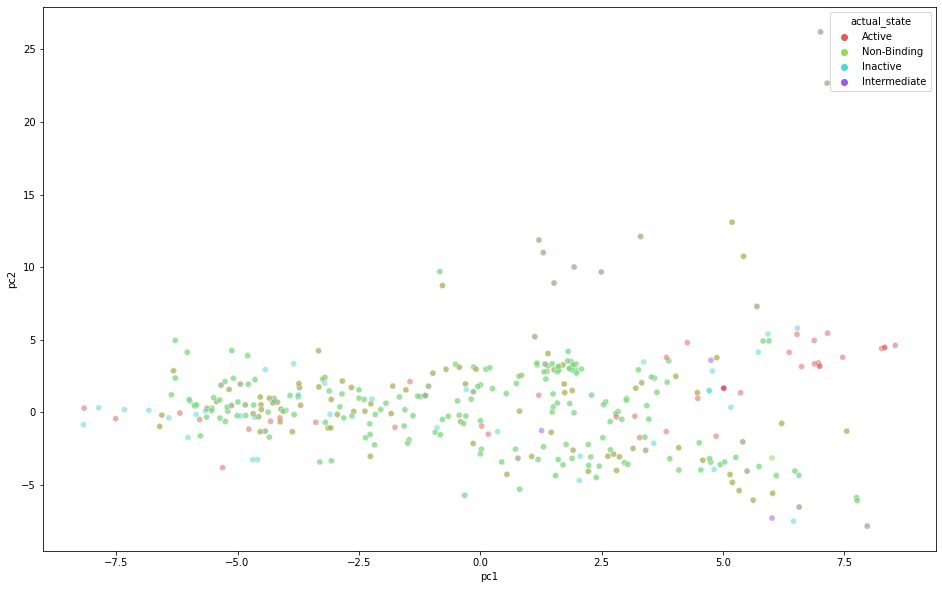

In [31]:
PCA_plot(X_imputed, X_states)

In [32]:
def TSNE_plot(df, states):
    from sklearn.manifold import TSNE
    import seaborn as sns
    %matplotlib inline
    import matplotlib.pyplot as plt

    tsne_X_imputed = df.copy()
    tsne = TSNE(n_components=2, verbose=1, random_state = 0)
    tsne_result = tsne.fit_transform(tsne_X_imputed.values)
    tsne_X_imputed['pc1'] = tsne_result[:,0]
    tsne_X_imputed['pc2'] = tsne_result[:,1]
    tsne_X_imputed = tsne_X_imputed.join(states, how = 'inner')

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="pc1", y="pc2",
        hue="actual_state",
        palette=sns.color_palette("husl", len(states.unique())),
        data=tsne_X_imputed,
        legend="full",
        alpha=0.9
    )
    plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 648 samples in 0.001s...
[t-SNE] Computed neighbors for 648 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 648 / 648
[t-SNE] Mean sigma: 4.181406
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.722984
[t-SNE] KL divergence after 1000 iterations: 0.811647


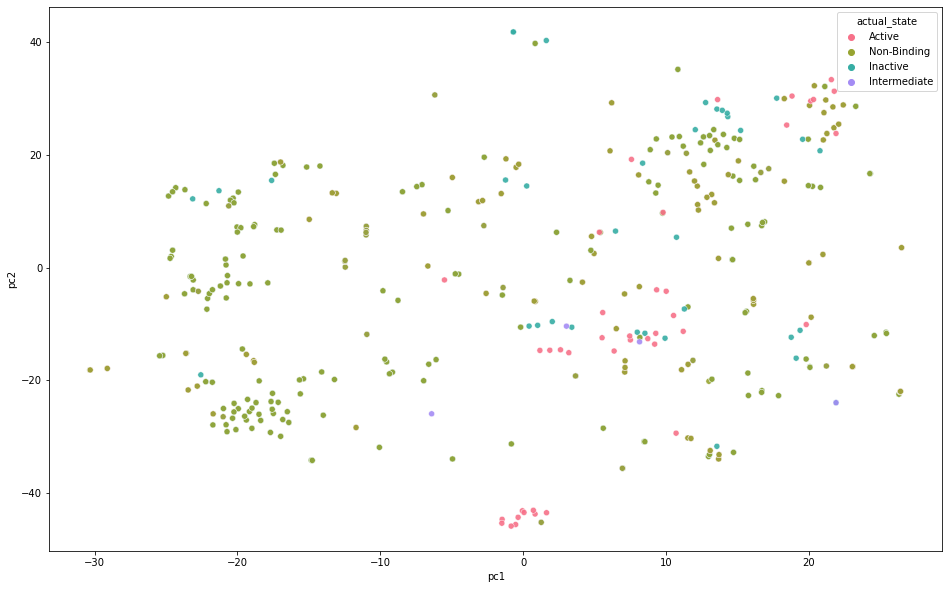

In [33]:
TSNE_plot(X_imputed, X_states)

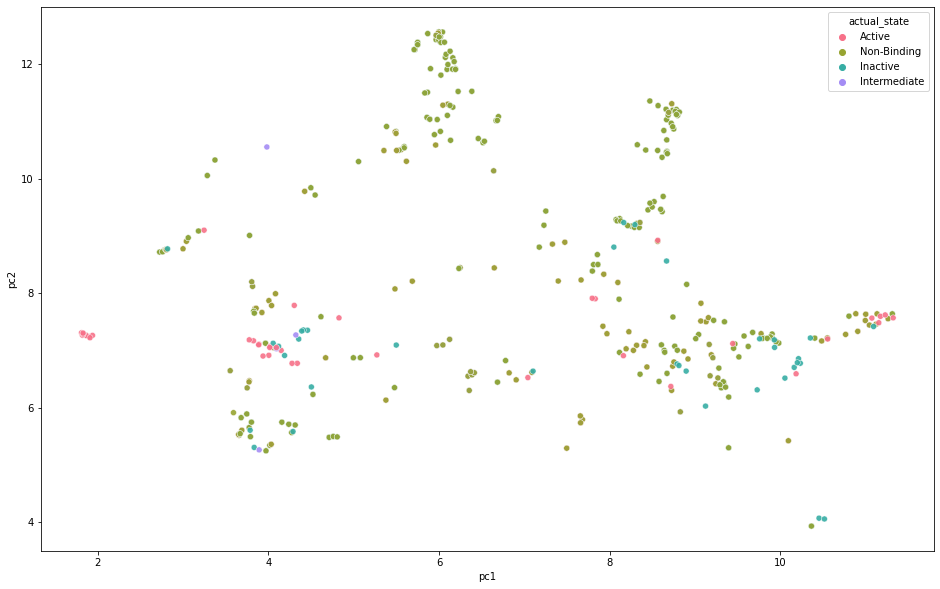

In [35]:
import umap
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

umap_X_imputed = X_imputed.copy()
reducer = umap.UMAP(random_state=42,n_components=2)
embedding = reducer.fit_transform(umap_X_imputed)
umap_X_imputed['pc1'] = reducer.embedding_[:, 0]
umap_X_imputed['pc2'] = reducer.embedding_[:, 1]
umap_X_imputed = umap_X_imputed.join(X_states, how = 'inner')

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pc1", y="pc2",
    hue="actual_state",
    palette=sns.color_palette("husl", len(X_states.unique())),
    data=umap_X_imputed,
    legend="full",
    alpha=0.9
)
plt.show()

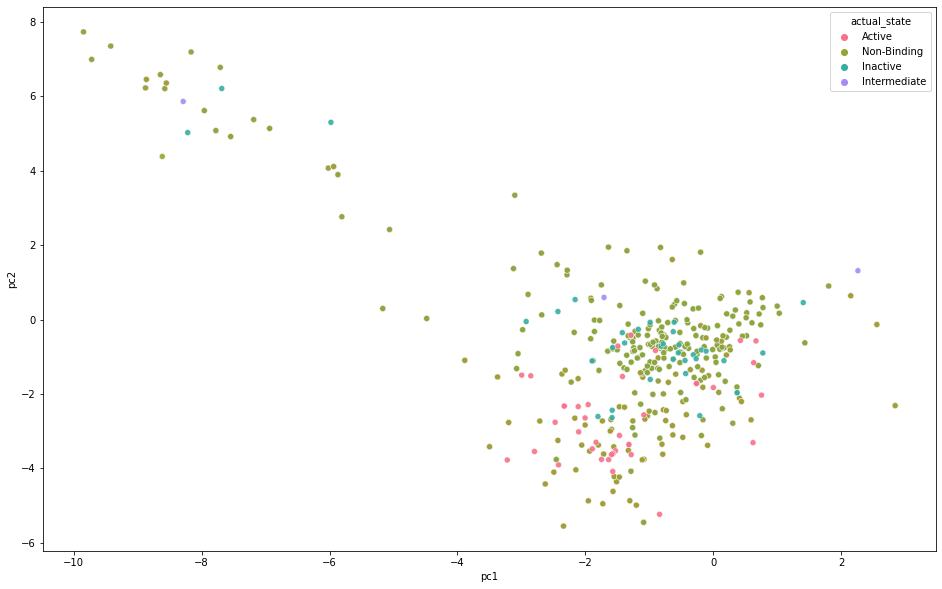

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

LDA_X_imputed = X_imputed.copy()
X_LDA = LDA(n_components=2).fit_transform(LDA_X_imputed,y)
LDA_X_imputed['pc1'] = X_LDA[:, 0]
LDA_X_imputed['pc2'] = X_LDA[:, 1]
LDA_X_imputed = LDA_X_imputed.join(X_states, how = 'inner')

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pc1", y="pc2",
    hue="actual_state",
    palette=sns.color_palette("husl", len(X_states.unique())),
    data=LDA_X_imputed,
    legend="full",
    alpha=0.9
)
plt.show()